# **Helper**

In [1]:
!pip install opencv-python numpy matplotlib scikit-image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json, time, os

# **Test**

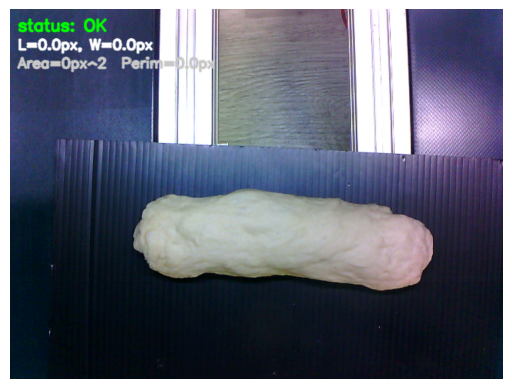

In [3]:
IMG_PATH = "/home/drasogun/DraSoGun/Work/Fibo/Project/img/real.png"
img = cv2.imread(IMG_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

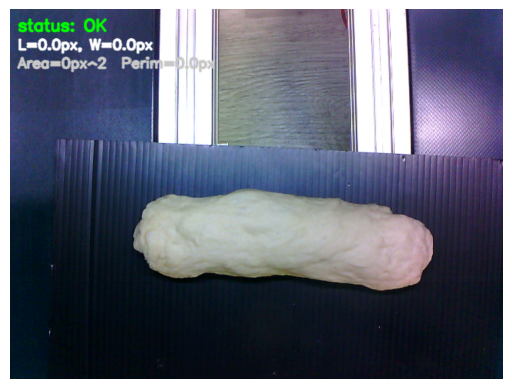

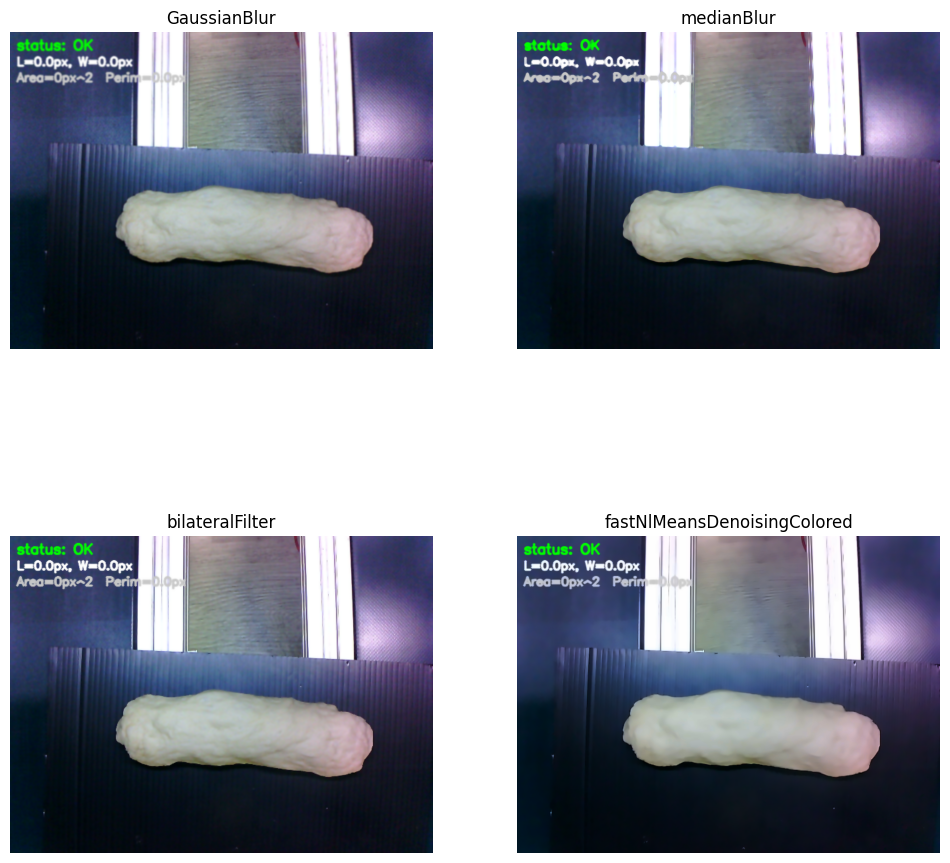

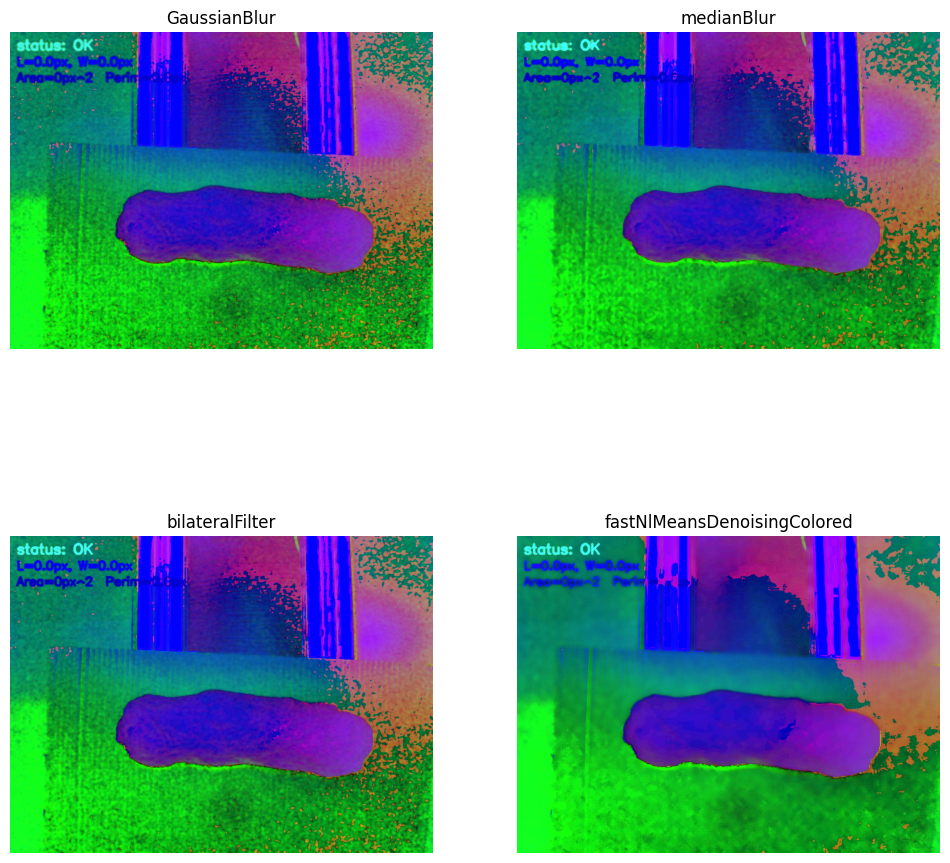

In [4]:
img_rgb_G = cv2.GaussianBlur(img_rgb, (9,9), 0)
img_rgb_M = cv2.medianBlur(img_rgb, 9)
img_rgb_B = cv2.bilateralFilter(img_rgb, d=9, sigmaColor=100, sigmaSpace=100)
img_rgb_FN = cv2.fastNlMeansDenoisingColored(img_rgb, None, 10, 10, 7, 21)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
img_hsv_G = cv2.cvtColor(img_rgb_G, cv2.COLOR_BGR2HSV)
img_hsv_M = cv2.cvtColor(img_rgb_M, cv2.COLOR_BGR2HSV)
img_hsv_B = cv2.cvtColor(img_rgb_B, cv2.COLOR_BGR2HSV)
img_hsv_FN = cv2.cvtColor(img_rgb_FN, cv2.COLOR_BGR2HSV)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0][0].imshow(img_rgb_G); axs[0][0].set_title('GaussianBlur'); axs[0][0].axis('off')
axs[0][1].imshow(img_rgb_M); axs[0][1].set_title('medianBlur'); axs[0][1].axis('off')
axs[1][0].imshow(img_rgb_B); axs[1][0].set_title('bilateralFilter'); axs[1][0].axis('off')
axs[1][1].imshow(img_rgb_FN); axs[1][1].set_title('fastNlMeansDenoisingColored'); axs[1][1].axis('off')
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0][0].imshow(img_hsv_G); axs[0][0].set_title('GaussianBlur'); axs[0][0].axis('off')
axs[0][1].imshow(img_hsv_M); axs[0][1].set_title('medianBlur'); axs[0][1].axis('off')
axs[1][0].imshow(img_hsv_B); axs[1][0].set_title('bilateralFilter'); axs[1][0].axis('off')
axs[1][1].imshow(img_hsv_FN); axs[1][1].set_title('fastNlMeansDenoisingColored'); axs[1][1].axis('off')
plt.show()

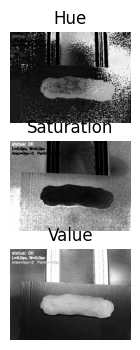

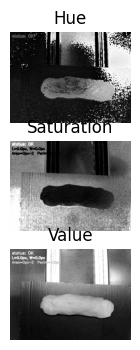

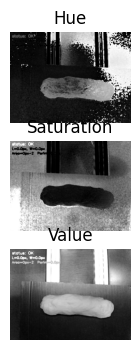

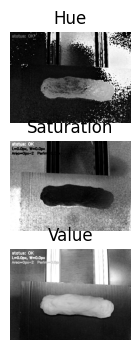

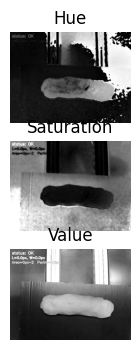

In [5]:
def show_hsv_channels(image_hsv):
    h, s, v = cv2.split(image_hsv)
    fig, axs = plt.subplots(3, 1, figsize=(12, 4))
    # plt.suptitle('HSV Channels', fontsize=16)
    axs[0].imshow(h, cmap='gray'); axs[0].set_title('Hue'); axs[0].axis('off')
    axs[1].imshow(s, cmap='gray'); axs[1].set_title('Saturation'); axs[1].axis('off')
    axs[2].imshow(v, cmap='gray'); axs[2].set_title('Value'); axs[2].axis('off')
    plt.show()
show_hsv_channels(img_hsv)
show_hsv_channels(img_hsv_G)
show_hsv_channels(img_hsv_M)
show_hsv_channels(img_hsv_B)
show_hsv_channels(img_hsv_FN)

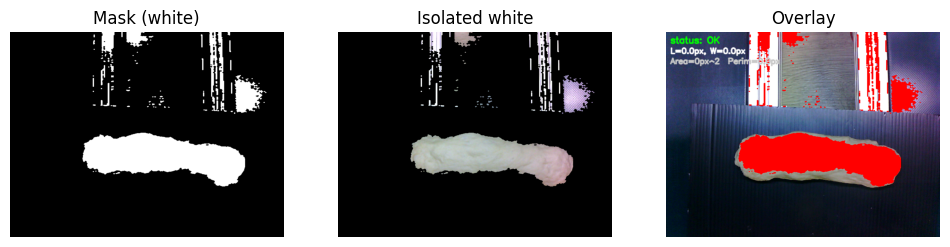

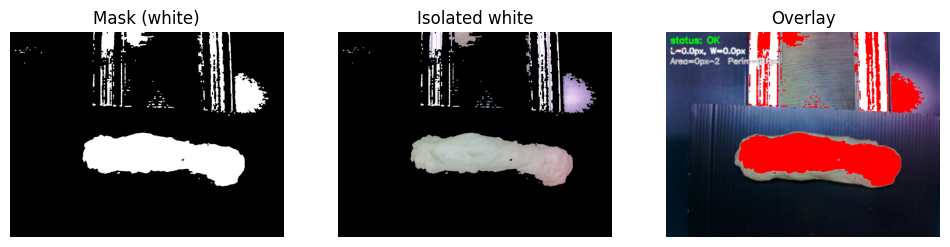

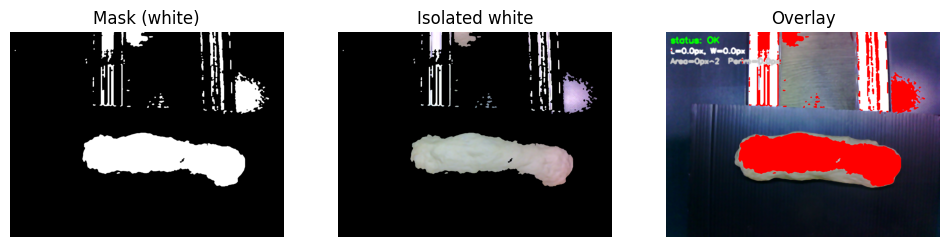

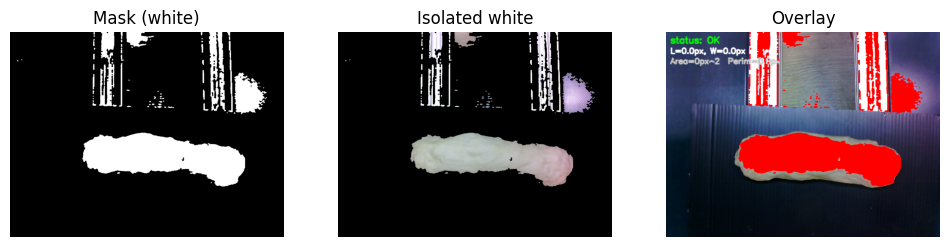

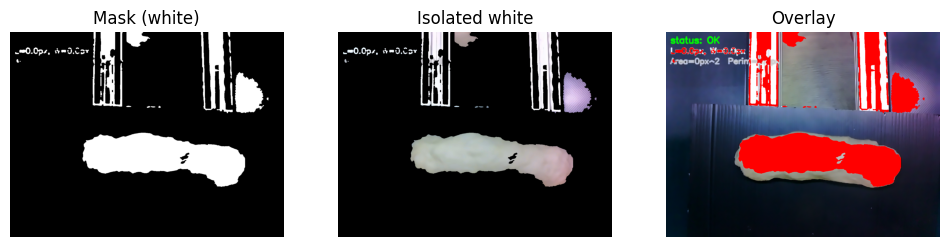

In [28]:
def mask(img_hsv):
    sat_th = 70    # S
    val_th = 160   # V

    lower = np.array([10, 0, val_th])
    upper = np.array([179, sat_th, 255])
    mask = cv2.inRange(img_hsv, lower, upper)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
    return mask
def show_mask(mask, img_rgb):
    res = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))  
    axs[0].imshow(mask, cmap='gray'); axs[0].set_title('Mask (white)'); axs[0].axis('off')
    axs[1].imshow(res); axs[1].set_title('Isolated white'); axs[1].axis('off')
    overlay = img_rgb.copy()
    overlay[mask == 255] = [255, 0, 0]
    axs[2].imshow(overlay); axs[2].set_title('Overlay'); axs[2].axis('off')
    plt.show()
show_mask(mask(img_hsv), img_rgb)
show_mask(mask(img_hsv_G), img_rgb_G)
show_mask(mask(img_hsv_M), img_rgb_M)
show_mask(mask(img_hsv_B), img_rgb_B)
show_mask(mask(img_hsv_FN), img_rgb_FN)

# **Preprocess**

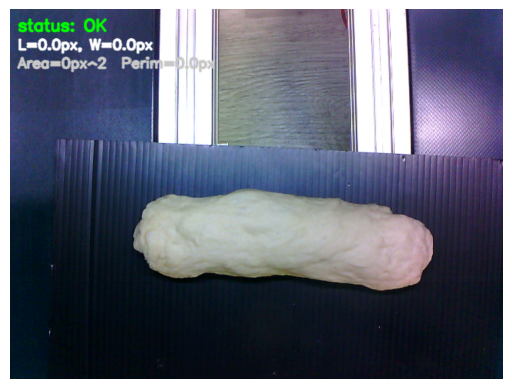

In [7]:
IMG_PATH = "/home/drasogun/DraSoGun/Work/Fibo/Project/img/real.png"
img = cv2.imread(IMG_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

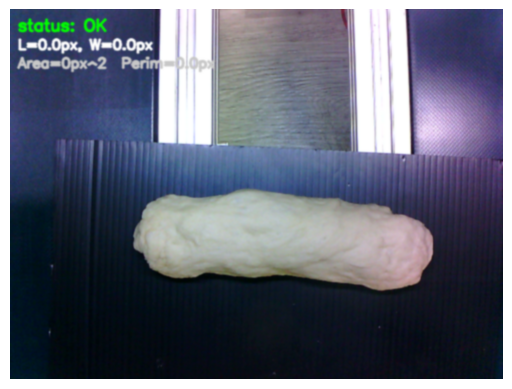

In [8]:
img_rgb_G = cv2.GaussianBlur(img_rgb, (9,9), 0)
img_hsv_G = cv2.cvtColor(img_rgb_G, cv2.COLOR_BGR2HSV)
plt.imshow(img_rgb_G)
plt.axis('off')
plt.show()

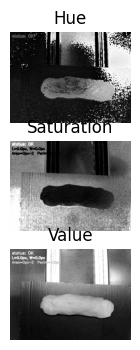

In [9]:
show_hsv_channels(img_hsv_G)

In [10]:
def mask(img_hsv):
    sat_th = 70    # S
    val_th = 160   # V

    lower = np.array([0, 0, val_th])
    upper = np.array([179, sat_th, 255])
    mask = cv2.inRange(img_hsv, lower, upper)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
    return mask

# **Process**

In [11]:
# ...existing code...
from skimage.morphology import skeletonize

def measure_from_mask(mask_img, min_area=500):
    mask = (mask_img > 0).astype(np.uint8) * 255

    # หา contours (external)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None, {}, 1

    c = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(c)
    if area < min_area:
        return None, {}, 1

    # min area rect / perimeter (เดิม)
    rect = cv2.minAreaRect(c)
    (cx, cy), (w, h), angle = rect
    perimeter = cv2.arcLength(c, True)

    # เตรียม filled contour เพื่อทำ thinning
    filled = np.zeros_like(mask)
    cv2.drawContours(filled, [c], -1, 255, thickness=-1)

    # Thinning (skeletonization) โดยใช้ skimage (ต้องเป็น boolean)
    skeleton = skeletonize(filled > 0)        # ผลเป็น boolean array, เส้นกว้าง 1-pixel
    skeleton_px_count = int(np.count_nonzero(skeleton))

    # คำนวณความกว้าง: หา shortest distance จาก skeleton แต่ละจุด ไปยัง contour แล้วเอาค่าเฉลี่ย แล้วคูณ 2
    skel_pts_yx = np.column_stack(np.where(skeleton))
    if skel_pts_yx.size == 0:
        width_px = float(min(w, h))
    else:
        skel_pts = np.empty((skel_pts_yx.shape[0], 2), dtype=float)
        skel_pts[:, 0] = skel_pts_yx[:, 1]  # x
        skel_pts[:, 1] = skel_pts_yx[:, 0]  # y
        contour_pts = c.reshape(-1, 2).astype(float)
        min_dists = []
        for px, py in skel_pts:
            d = np.hypot(contour_pts[:, 0] - px, contour_pts[:, 1] - py)
            min_dists.append(d.min())
        mean_dist = float(np.mean(min_dists)) if min_dists else 0.0
        width_px = 2.0 * mean_dist

    # สร้าง overlay สำหรับแสดงผล (BGR) และวาด contour + skeleton
    overlay = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(overlay, [c], -1, (0,255,0), 2)    # contour สีเขียว
    ys, xs = np.where(skeleton)
    if ys.size > 0:
        overlay[ys, xs] = (255, 0, 0)                    # (B,G,R) -> แสดงเป็นแดง

    # metrics คืนค่า skeleton length และ width
    metrics = {
        "area_px2": float(area),
        "perimeter_px": float(perimeter),
        "length_px": float(skeleton_px_count),
        "width_px":  float(width_px),
    }

    # ตรวจหาช่องว่าง (holes) ภายใน contour
    holes = cv2.bitwise_and(filled, cv2.bitwise_not(mask))
    hole_contours, _ = cv2.findContours(holes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    status = 1
    if hole_contours:
        status = 0

    return overlay, metrics, status
# ...existing code...

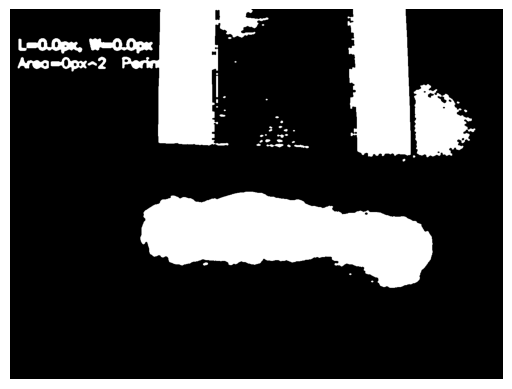

{'area_px2': 116625.5, 'perimeter_px': 2038.4864906072617, 'length_px': 1428.0, 'width_px': 107.00001945718621}
0


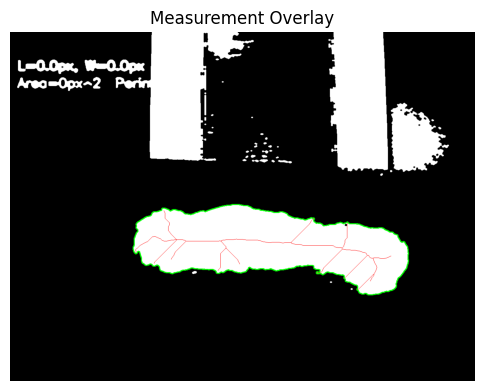

In [12]:
mask_img = mask(img_hsv_G)
plt.imshow(mask_img, cmap='gray')
plt.axis('off')
plt.show()
overlay, m, status = measure_from_mask(mask_img, min_area=500)
print(m)
print(status)
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(overlay); axs.set_title('Measurement Overlay'); axs.axis('off')
plt.show()

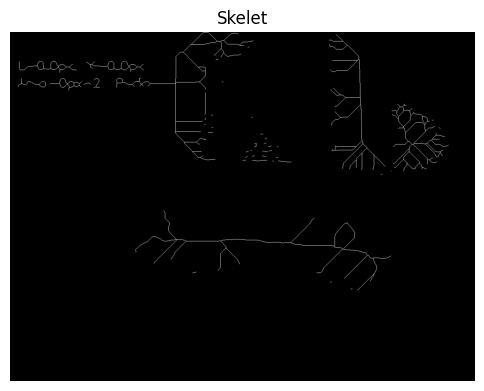

In [13]:
img = mask(img_hsv_G)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
binary_bool = binary > 0
skeleton = skeletonize(binary_bool)
skeleton_img = (skeleton * 255).astype(np.uint8)
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(cv2.cvtColor(skeleton_img, cv2.COLOR_RGB2BGR)); axs.set_title('Skelet'); axs.axis('off')
plt.show()
